# Introdução - Attrition
Existem dois conceitos de attrition: 1) Representa a saída do funcionário da empresa em função de uma aposentadoria ou quando determinado cargo é eliminado 2) Refere-se a funcionários que se sentem desmotivados ou insatisfeitos com o trabalho e, como consequência, podem sair da empresa. Esta classificação é realizada pelo RH.
Para esta análise, utilizaremos o segundo conceito, sendo o objetivo dela explorar os dados do dataset fictício [desgaste-de-funcionários](https://www.kaggle.com/datasets/patelprashant/employee-attrition) e responder as seguintes perguntas:
1. Qual a forma do dataset?
2. Qual o % de attrition?
3. Quais os possíveis fatores que influenciam a classificação de attrition?
4. Existem funcionários com: *Satisfação do ambiente de trabalho*, *Envolvimento no trabalho*, *Satisfação profissional*, *Classificação de desempenho*, *Satisfação no relacionamento*, *Equilibrio entre vida pessoal e trabalho* **boa** ou **excelente** e que estão ao mesmo tempo desgastados?
5. Para cada um dos índices de satisfação acima, qual o % de funcionários (desgastados e nao desgastados) que se enquadram em **baixa** e **media**?

**OBS**: Esta análise se limitará a descritiva e disgnóstiva. Nao olharemos todas as variáveis(X) do dataset que causam *attrition**(y). O objetivo será uma análise mais simples.

y = *attrition*
X = *Satisfação do ambiente de trabalho*, *Envolvimento no trabalho*, *Satisfação profissional*, *Classificação de desempenho*, *Satisfação no relacionamento*, *Equilibrio entre vida pessoal e trabalho* 



## Análise descritiva

###1. Qual a forma do dataset?

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#lendo dataset e armazenando na variavel df
df = pd.read_excel('/content/drive/MyDrive/desgaste-de-funcionarios/desgaste-de-funcionários.xlsx')

In [ ]:
#informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Podemos observar acima que não temos valores nulos em nenhuma das colunas do dataset e todas as colunas estão com o tipo de dados corretos. Assim, podemos prosseguir a analise sem fazer a conversão de tipo de dados e o tratamento de valores nulos.

In [ ]:
#analisando a forma do dataset e as 5 primeiras linhas
print(f'O dataset tem {df.shape[1]} colunas e {df.shape[0]} linhas \n')
df.head(5)

O dataset tem 35 colunas e 1470 linhas 



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


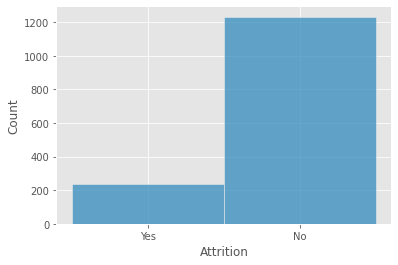

In [ ]:
#distribuição de attrition
_ = sns.histplot(data=df,x='Attrition')

### Qual o % de attrition?

In [ ]:
#realizando o cálculo de attrition
attrition_yes = df.query('Attrition=="Yes"')
attrition_percent = (attrition_yes['Attrition'].count() / df['Attrition'].count())*100
print(f'O percentual de attrition é {round(attrition_percent,2)}%')

O percentual de attrition é 16.12%


## Análise diagnóstica

### Quais os possíveis fatores que influenciam a classificação de attrition?

In [ ]:
#função para adicionar rotulo de dados aos gráficos
def rotulo(valor):
  for i in valor:
    h = i.get_height()
    plt.subplot().annotate('{}'.format(h),
                           xy = (i.get_x()+i.get_width()/2,h),
                           xytext = (0,3),
                           textcoords = 'offset points',
                           ha = 'center'
                           )

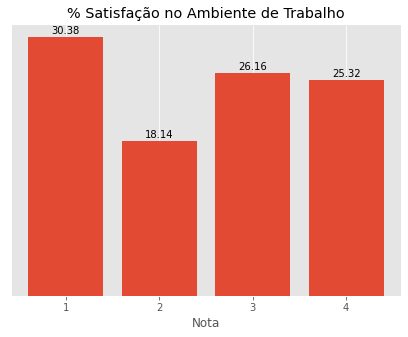

In [ ]:
#EnvironmentSatisfaction -> 1 'Baixa' 2 'Média' 3 'Alta' 4 'Muito Alta'
table = pd.pivot_table(data=attrition_yes, values='EmployeeCount',index='EnvironmentSatisfaction', aggfunc=np.sum).apply(lambda x:100 * x / float(x.sum())).round(2)
plt.figure(figsize=(7, 5))
_ = plt.bar(table.index,table.EmployeeCount)
rotulo(_) 
plt.axes().get_yaxis().set_visible(False)
plt.xticks(range(1,5,1))
plt.title('% Satisfação no Ambiente de Trabalho')
plt.xlabel('Nota')
plt.show()
 

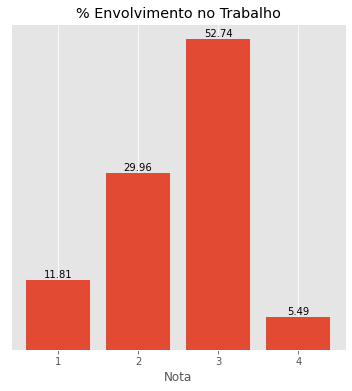

In [ ]:
# JobInvolvement - > 1 'Baixa' 2 'Média' 3 'Alta' 4 'Muito Alta'
table = pd.pivot_table(data=attrition_yes, values='EmployeeCount',index='JobInvolvement', aggfunc=np.sum).apply(lambda x:100 * x / float(x.sum())).round(2)
plt.figure(figsize=(6, 6))
_ = plt.bar(table.index,table.EmployeeCount)
rotulo(_) 
plt.axes().get_yaxis().set_visible(False)
plt.xticks(range(1,5,1))
plt.title('% Envolvimento no Trabalho')
plt.xlabel('Nota')
plt.show()

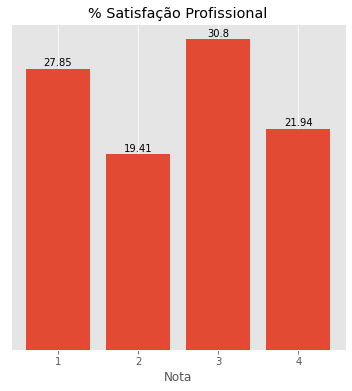

In [ ]:
# JobSatisfaction - > 1 'Baixa' 2 'Média' 3 'Alta' 4 'Muito Alta'
table = pd.pivot_table(data=attrition_yes, values='EmployeeCount',index='JobSatisfaction', aggfunc=np.sum).apply(lambda x:100 * x / float(x.sum())).round(2)
plt.figure(figsize=(6, 6))
_ = plt.bar(table.index,table.EmployeeCount)
rotulo(_) 
plt.axes().get_yaxis().set_visible(False)
plt.xticks(range(1,5,1))
plt.title('% Satisfação Profissional')
plt.xlabel('Nota')
plt.show()

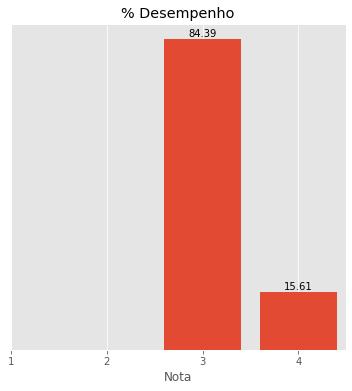

In [ ]:
# PerformanceRating - > 1 'Baixa' 2 'Média' 3 'Alta' 4 'Muito Alta'
table = pd.pivot_table(data=attrition_yes, values='EmployeeCount',index='PerformanceRating', aggfunc=np.sum).apply(lambda x:100 * x / float(x.sum())).round(2)
plt.figure(figsize=(6, 6))
_ = plt.bar(table.index,table.EmployeeCount)
rotulo(_) 
plt.axes().get_yaxis().set_visible(False)
plt.xticks(range(1,5,1))
plt.title('% Desempenho')
plt.xlabel('Nota')
plt.show()

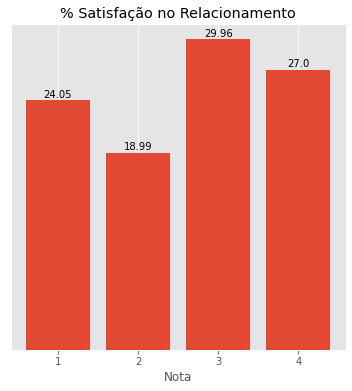

In [ ]:
# RelationshipSatisfaction 1 'Baixa' 2 'Média' 3 'Alta' 4 'Muito Alta'
table = pd.pivot_table(data=attrition_yes, values='EmployeeCount',index='RelationshipSatisfaction', aggfunc=np.sum).apply(lambda x:100 * x / float(x.sum())).round(2)
plt.figure(figsize=(6, 6))
_ = plt.bar(table.index,table.EmployeeCount)
rotulo(_) 
plt.axes().get_yaxis().set_visible(False)
plt.xticks(range(1,5,1))
plt.title('% Satisfação no Relacionamento')
plt.xlabel('Nota')
plt.show()

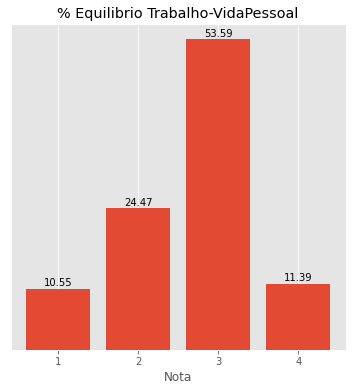

In [ ]:
# WorkLifeBalance -> 1 'Baixa' 2 'Média' 3 'Alta' 4 'Muito Alta'
table = pd.pivot_table(data=attrition_yes, values='EmployeeCount',index='WorkLifeBalance', aggfunc=np.sum).apply(lambda x:100 * x / float(x.sum())).round(2)
plt.figure(figsize=(6, 6))
_ = plt.bar(table.index,table.EmployeeCount)
rotulo(_) 
plt.axes().get_yaxis().set_visible(False)
plt.xticks(range(1,5,1))
plt.title('% Equilibrio Trabalho-VidaPessoal')
plt.xlabel('Nota')
plt.show()

###4. Existem funcionários com: Satisfação do ambiente de trabalho, Envolvimento no trabalho, Satisfação profissional, Classificação de desempenho, Satisfação no relacionamento, Equilibrio entre vida pessoal e trabalho **boa** ou **excelente** e que estão ao mesmo tempo desgastados?

In [ ]:
#attrition = yes

table1_yes = np.logical_or(attrition_yes['EnvironmentSatisfaction'] == 3, attrition_yes['EnvironmentSatisfaction'] == 4)
table2_yes = np.logical_or(attrition_yes['JobInvolvement'] == 3, attrition_yes['JobInvolvement'] == 4)
table3_yes = np.logical_or(attrition_yes['JobSatisfaction'] == 3, attrition_yes['JobSatisfaction'] == 4)
table4_yes = np.logical_or(attrition_yes['PerformanceRating'] == 3, attrition_yes['PerformanceRating'] == 4)
table5_yes = np.logical_or(attrition_yes['RelationshipSatisfaction'] == 3, attrition_yes['RelationshipSatisfaction'] == 4)
table6_yes = np.logical_or(attrition_yes['WorkLifeBalance'] == 3, attrition_yes['WorkLifeBalance'] == 4)

#attrition = no
attrition_no = df.query('Attrition=="No"')
table1_no = np.logical_or(attrition_no['EnvironmentSatisfaction'] == 3, attrition_no['EnvironmentSatisfaction'] == 4)
table2_no = np.logical_or(attrition_no['JobInvolvement'] == 3, attrition_no['JobInvolvement'] == 4)
table3_no = np.logical_or(attrition_no['JobSatisfaction'] == 3, attrition_no['JobSatisfaction'] == 4)
table4_no = np.logical_or(attrition_no['PerformanceRating'] == 3, attrition_no['PerformanceRating'] == 4)
table5_no = np.logical_or(attrition_no['RelationshipSatisfaction'] == 3, attrition_no['RelationshipSatisfaction'] == 4)
table6_no = np.logical_or(attrition_no['WorkLifeBalance'] == 3, attrition_no['WorkLifeBalance'] == 4)

percent_yes = attrition_yes[table1_yes & table2_yes & table3_yes & table4_yes & table5_yes & table6_yes].EmployeeCount.sum()/attrition_yes.EmployeeCount.sum()
percent_no = attrition_no[table1_no & table2_no & table3_no & table4_no & table5_no & table6_no].EmployeeCount.sum()/attrition_no.EmployeeCount.sum()
print(f'O % de funcionarios desgastados que possuem as variaveis de satisfação com valores boa ou excelente é de {round(percent_yes*100,2)}%.\nEnquanto que os que não estão desgastados é de {round(percent_no*100,2)}%.')

O % de funcionarios desgastados que possuem as variaveis de satisfação com valores boa ou excelente é de 5.49%.
Enquanto que os que não estão desgastados é de 11.92%.


###5. Para cada um dos índices de satisfação acima, qual o % de funcionários (desgastados e nao desgastados) que se enquadram em **baixa** e **media**?

In [ ]:
#attrition = yes
colunas = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
valores_attrition_no = map(lambda x: np.logical_or(attrition_yes[x] == 1, attrition_yes[x] == 2),colunas)
lista_valores = map(lambda x: round(attrition_yes[x].EmployeeCount.sum()/attrition_yes.EmployeeCount.sum()*100,2),valores_attrition_no)

#attrition = no
valores_attrition_yes = map(lambda x: np.logical_or(df.query('Attrition=="No"')[x] == 1, df.query('Attrition=="No"')[x] == 2),colunas)
lista_valores2 = map(lambda x: round(df.query('Attrition=="No"')[x].EmployeeCount.sum()/df.query('Attrition=="No"').EmployeeCount.sum()*100,2),valores_attrition_yes)

data = pd.DataFrame(
    index=colunas,
    data={'attrition_yes':lista_valores,'attrition_no':lista_valores2}
)
data['dif'] = data['attrition_yes']-data['attrition_no']
data.sort_values('dif',ascending=False)



,attrition_yes,attrition_no,dif
JobInvolvement,41.77,29.12,12.65
EnvironmentSatisfaction,48.52,36.98,11.54
JobSatisfaction,47.26,37.06,10.20
WorkLifeBalance,35.02,27.66,7.36
RelationshipSatisfaction,43.04,38.69,4.35
PerformanceRating,0.00,0.00,0.00


##Conclusão

Conforme analises realizadas acima, partindo do princípio de que os índices das colunas de satisfação possuem influência sobre o desgaste do funcionário, podemos concluir:<br>
1) Existe um percentual (5.49%) de funcionário que estão com valores **boa** ou **excelente** em todos os índices de satisfação e que, ainda assim, estão desgastados. Neste caso, poderíamos considerá-los como outliers.<br>
2) Comparando cada índice de satisfação contas notas **baixa** ou **media** tanto dos funcionários desgastados quanto dos não desgastados, é possível notar que os desgastados tem um percentual superior (ou seja, existem mais funcionários desgastados com uma satisfação menor que boa em relação aos não desgastados, o que nos levar a concluir que esses índices podem refletir, até certo ponto, no desgaste.

Além disso, pode ser que existam mais critérios de avaliação, que não foram compartilhados, que podem explicar os 5.49% de funcionário que estão com valores **boa** ou **excelente** em todos os índices de satisfação. Para isso, poderíamos levantar outras questões, como: existe alguma relação entre desgaste e tempo de empresa? o salário tem influência sobre o desgaste?, etc.